# Data preprocessing

In [28]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [29]:
data_raw = pd.read_csv('SBAnational.csv', low_memory=False)

In [30]:
data_raw.shape

(899164, 27)

In [31]:
data_raw.head(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [32]:
data_raw = data_raw.drop(columns=['Name', 'Zip', 'LowDoc', 'DisbursementGross', 'ChgOffPrinGr', 'BalanceGross'])

Remove strange values from RevLineCr data frame

In [33]:
bool_mask = data_raw['RevLineCr'] == 'N'
bool_mask |= data_raw['RevLineCr'] == '0' 
bool_mask |= data_raw['RevLineCr'] == 'Y' 
bool_mask |= data_raw['RevLineCr'] == 'T'

data_raw = data_raw[bool_mask]

Convert all object types to category

In [34]:
def convert_from_str_to_float(column):
    column = column.str.removeprefix("$")
    column = column.str.removesuffix(" ")
    column = column.str.replace(',', '')
    column = column.astype('float64')

    return column

In [35]:
data_raw['City'] = data_raw['City'].astype('category')
data_raw['State'] = data_raw['State'].astype('category')
data_raw['Bank'] = data_raw['Bank'].astype('category')
data_raw['BankState'] = data_raw['BankState'].astype('category')
data_raw['MIS_Status'] = data_raw['MIS_Status'].astype('category')
data_raw['RevLineCr'] = data_raw['RevLineCr'].astype('category')

data_raw['GrAppv'] = convert_from_str_to_float(data_raw['GrAppv'])
data_raw['SBA_Appv'] = convert_from_str_to_float(data_raw['SBA_Appv'])

Get NAICS industry code and remove all rows with null MIS_STATUS 

In [36]:
data_raw['NAICS'] = data_raw['NAICS'] // 10000
data_raw['NAICS'].astype('category')

data_raw = data_raw[data_raw['MIS_Status'].notna()]

Convert all date columns to years (int type)

In [37]:
data_raw['ApprovalDate'] = pd.to_datetime(data_raw['ApprovalDate'])
data_raw['ChgOffDate'] = pd.to_datetime(data_raw['ChgOffDate'])
data_raw['DisbursementDate'] = pd.to_datetime(data_raw['DisbursementDate'])

data_raw = data_raw[data_raw['ApprovalDate'] < pd.to_datetime('01.01.2020')]

def truncate_date_to_year(elem):
    if pd.isnull(elem):
        return 0
    return int(elem.year)

data_raw['ApprovalDate'] = data_raw['ApprovalDate'].apply(truncate_date_to_year)
data_raw['ChgOffDate'] = data_raw['ChgOffDate'].apply(truncate_date_to_year)
data_raw['DisbursementDate'] = data_raw['DisbursementDate'].apply(truncate_date_to_year)
data_raw['ApprovalDate'] = data_raw['ApprovalDate'].astype('int64')
data_raw['ChgOffDate'] = data_raw['ChgOffDate'].astype('int64')
data_raw['DisbursementDate'] = data_raw['DisbursementDate'].astype('int64')

def remove_strange_years(elem):
    if(elem == '1976A'):
        return '1976'
    return elem

data_raw['ApprovalFY'] = data_raw['ApprovalFY'].apply(remove_strange_years)
data_raw['ApprovalFY'].value_counts()
data_raw['ApprovalFY'] =  data_raw['ApprovalFY'].astype('int64')

/tmp/ipykernel_5384/2006507995.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_raw['ApprovalDate'] = pd.to_datetime(data_raw['ApprovalDate'])
/tmp/ipykernel_5384/2006507995.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_raw['ChgOffDate'] = pd.to_datetime(data_raw['ChgOffDate'])
/tmp/ipykernel_5384/2006507995.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_raw['DisbursementDate'] = pd.to_datetime(data_raw['DisbursementDate'])


In [38]:
bool_mask = data_raw['ChgOffDate'].notnull() & (data_raw['MIS_Status'] != 'CHGOFF')

data_raw[bool_mask]

,LoanNr_ChkDgt,City,State,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,ChgOffDate,DisbursementDate,MIS_Status,GrAppv,SBA_Appv
0,1000014003,EVANSVILLE,IN,FIFTH THIRD BANK,OH,45,1997,1997,84,4,...,0,0,1,0,N,0,1999,P I F,60000.0,48000.0
1,1000024006,NEW PARIS,IN,1ST SOURCE BANK,IN,72,1997,1997,60,2,...,0,0,1,0,N,0,1997,P I F,40000.0,32000.0
2,1000034009,BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,62,1997,1997,180,7,...,0,0,1,0,N,0,1997,P I F,287000.0,215250.0
3,1000044001,BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,0,1997,1997,60,2,...,0,0,1,0,N,0,1997,P I F,35000.0,28000.0
4,1000054004,ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,0,1997,1997,240,14,...,7,7,1,0,N,0,1997,P I F,229000.0,229000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899158,9995563001,IRVING,TX,LOANS FROM OLD CLOSED LENDERS,DC,0,1997,1997,84,5,...,0,0,1,0,N,0,1997,P I F,79000.0,63200.0
899159,9995573004,UPPER ARLINGTON,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,45,1997,1997,60,6,...,0,0,1,0,0,0,1997,P I F,70000.0,56000.0
899160,9995603000,COLUMBUS,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,45,1997,1997,60,6,...,0,0,1,0,Y,0,1997,P I F,85000.0,42500.0
899161,9995613003,SANTA MARIA,CA,"RABOBANK, NATIONAL ASSOCIATION",CA,33,1997,1997,108,26,...,0,0,1,0,N,0,1997,P I F,300000.0,225000.0


In [71]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880791 entries, 0 to 899163
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   LoanNr_ChkDgt     880791 non-null  int64   
 1   City              880761 non-null  category
 2   State             880779 non-null  category
 3   Bank              879301 non-null  category
 4   BankState         879294 non-null  category
 5   NAICS             880791 non-null  int64   
 6   ApprovalFY        880791 non-null  int64   
 7   Term              880791 non-null  int64   
 8   NoEmp             880791 non-null  int64   
 9   NewExist          880666 non-null  float64 
 10  CreateJob         880791 non-null  int64   
 11  FranchiseCode     880791 non-null  int64   
 12  UrbanRural        880791 non-null  int64   
 13  RevLineCr         880791 non-null  category
 14  ChgOffDate        880791 non-null  int64   
 15  DisbursementDate  880791 non-null  int64   
 16  MIS_Sta

In [40]:
data_raw.describe()

,LoanNr_ChkDgt,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,ChgOffDate,DisbursementDate,GrAppv,SBA_Appv
count,8.925000e+05,892500.000000,892500.000000,892500.000000,892500.000000,892500.000000,892366.000000,892500.000000,892500.000000,892500.000000,892500.000000,892500.000000,892500.000000,8.925000e+05,8.925000e+05
mean,4.760178e+09,39.677844,2000.931888,2001.164375,110.740617,11.403408,1.280387,8.478839,10.857871,2756.506253,0.760371,365.009914,1996.344142,1.929508e+05,1.495664e+05
std,2.533737e+09,26.260497,5.898733,5.902185,78.879008,73.943503,0.451726,237.567853,238.000472,12764.290811,0.645955,774.422126,98.797043,2.830657e+05,2.278304e+05
min,1.000014e+09,0.000000,1973.000000,1973.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,5.000000e+02
25%,2.585617e+09,23.000000,1996.000000,1997.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1997.000000,3.500000e+04,2.125000e+04
50%,4.344224e+09,44.000000,2002.000000,2003.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2002.000000,9.000000e+04,6.160000e+04
75%,6.854669e+09,56.000000,2006.000000,2006.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.000000,2006.000000,2.250000e+05,1.750000e+05
max,9.996003e+09,92.000000,2014.000000,2014.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,2026.000000,2048.000000,5.000000e+06,4.500000e+06


In [41]:
data_raw.describe(include=['category'])

,City,State,Bank,BankState,RevLineCr,MIS_Status
count,892470,892488,891003,890996,892500,892500
unique,32420,51,5798,56,4,2
top,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,N,P I F
freq,11529,129963,86545,117603,419170,735128


In [42]:
data_raw.head()

,LoanNr_ChkDgt,City,State,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,ChgOffDate,DisbursementDate,MIS_Status,GrAppv,SBA_Appv
0,1000014003,EVANSVILLE,IN,FIFTH THIRD BANK,OH,45,1997,1997,84,4,...,0,0,1,0,N,0,1999,P I F,60000.0,48000.0
1,1000024006,NEW PARIS,IN,1ST SOURCE BANK,IN,72,1997,1997,60,2,...,0,0,1,0,N,0,1997,P I F,40000.0,32000.0
2,1000034009,BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,62,1997,1997,180,7,...,0,0,1,0,N,0,1997,P I F,287000.0,215250.0
3,1000044001,BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,0,1997,1997,60,2,...,0,0,1,0,N,0,1997,P I F,35000.0,28000.0
4,1000054004,ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,0,1997,1997,240,14,...,7,7,1,0,N,0,1997,P I F,229000.0,229000.0


# Data analyze

Visualize correlation matrix

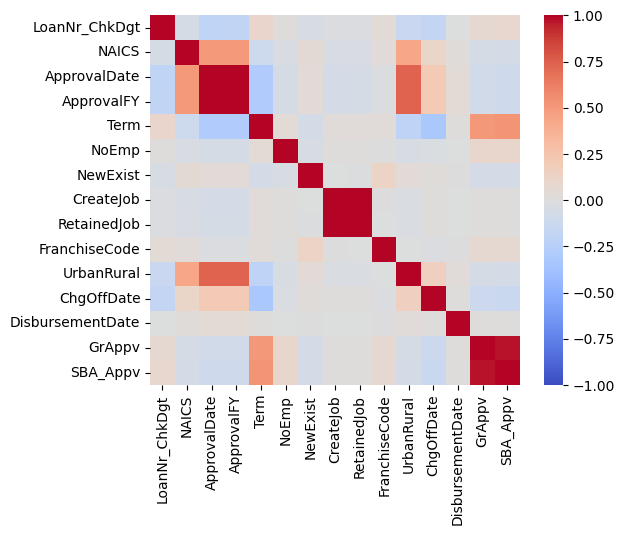

In [43]:
corr_mat = data_raw.corr(numeric_only=True)
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Remove correlating values

In [44]:
data_raw = data_raw.drop(columns=['ApprovalDate', 'RetainedJob', 'SBA_Appv'])

Emissions control

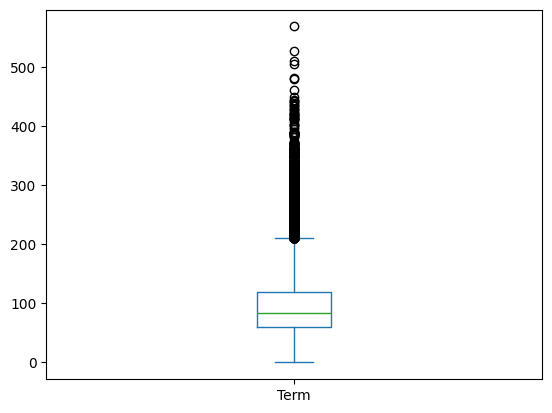

In [45]:
data_raw['Term'].plot(kind='box')
pass

In [46]:
data_raw = data_raw[data_raw['Term'].quantile(0.999) > data_raw["Term"]]

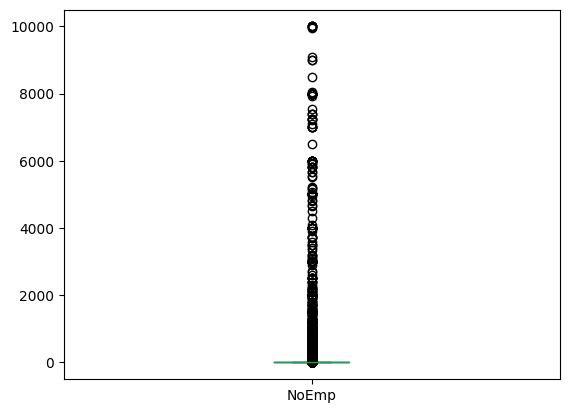

In [47]:
data_raw['NoEmp'].plot(kind='box')
pass

In [48]:
data_raw = data_raw[data_raw['NoEmp'].quantile(0.999) > data_raw['NoEmp']]

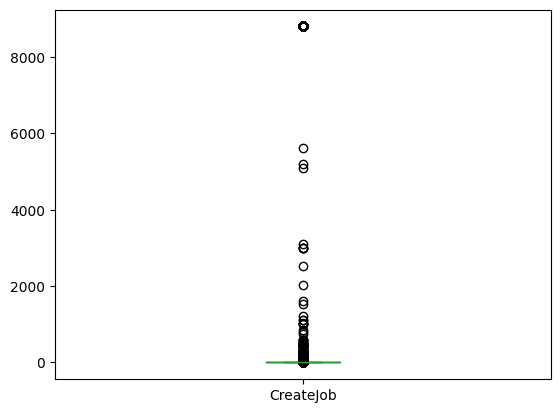

In [49]:
data_raw['CreateJob'].plot(kind='box')
pass

In [50]:
data_raw = data_raw[data_raw['CreateJob'].quantile(0.999) > data_raw['CreateJob']]

<Axes: >

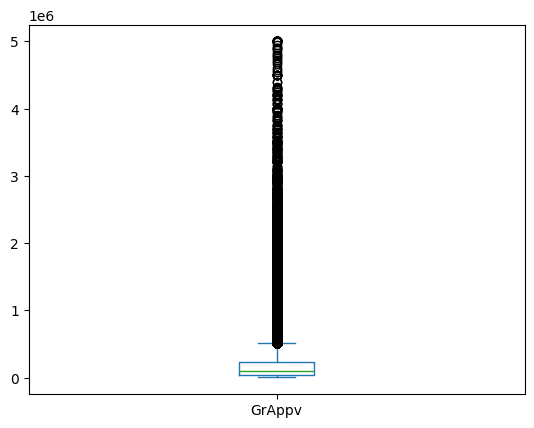

In [51]:
data_raw['GrAppv'].plot(kind='box')

In [52]:
data_raw = data_raw[data_raw['GrAppv'].quantile(0.99) > data_raw['GrAppv']]


Plot scatter matrix

In [53]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(data_raw, alpha = .01, figsize = (30, 30))
# pass

# Train and Test datasets

In [58]:
X = data_raw.drop(columns='MIS_Status')
y = data_raw['MIS_Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(748672, 132119)

Fill null values

In [68]:
X_test.isnull().sum()

LoanNr_ChkDgt         0
City                  3
State                 1
Bank                225
BankState           227
NAICS                 0
ApprovalFY            0
Term                  0
NoEmp                 0
NewExist             23
CreateJob             0
FranchiseCode         0
UrbanRural            0
RevLineCr             0
ChgOffDate            0
DisbursementDate      0
GrAppv                0
dtype: int64

In [67]:
X_train.isnull().sum()

LoanNr_ChkDgt       0
City                0
State               0
Bank                0
BankState           0
NAICS               0
ApprovalFY          0
Term                0
NoEmp               0
NewExist            0
CreateJob           0
FranchiseCode       0
UrbanRural          0
RevLineCr           0
ChgOffDate          0
DisbursementDate    0
GrAppv              0
dtype: int64

In [64]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(X_train[['City', 'State', 'Bank', 'BankState', 'NewExist']])

SimpleImputer(strategy='most_frequent')

In [66]:
X_train[['City', 'State', 'Bank', 'BankState', 'NewExist']] = imp_cat.transform(X_train[['City', 'State', 'Bank', 'BankState', 'NewExist']])

In [75]:
for elem in X_train:
    print(elem ,":",len(X_train[elem].unique()))

LoanNr_ChkDgt : 748672
City : 30190
State : 51
Bank : 5625
BankState : 56
NAICS : 25
ApprovalFY : 42
Term : 309
NoEmp : 293
NewExist : 3
CreateJob : 153
FranchiseCode : 2608
UrbanRural : 3
RevLineCr : 4
ChgOffDate : 28
DisbursementDate : 46
GrAppv : 18301
